In [2]:
import pandas as pd 

In [3]:
data=pd.read_csv('loan_data.csv')
data.head()

,Gender,Married,Education,ApplicantIncome,LoanAmount,Property_Area,Loan_Status
0,Male,Yes,Graduate,4583,128,Rural,N
1,Male,Yes,Graduate,3000,66,Urban,Y
2,Male,Yes,Not Graduate,2583,120,Urban,Y
3,Male,No,Graduate,6000,141,Urban,Y
4,Male,Yes,Not Graduate,2333,95,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           376 non-null    object
 1   Married          381 non-null    object
 2   Education        381 non-null    object
 3   ApplicantIncome  381 non-null    int64 
 4   LoanAmount       381 non-null    int64 
 5   Property_Area    381 non-null    object
 6   Loan_Status      381 non-null    object
dtypes: int64(2), object(5)
memory usage: 21.0+ KB


In [5]:
import numpy as np


In [6]:
data.isnull().sum()

Gender             5
Married            0
Education          0
ApplicantIncome    0
LoanAmount         0
Property_Area      0
Loan_Status        0
dtype: int64

In [7]:
data.duplicated().any()

False

In [8]:
data['Loan_Status'].value_counts()

Loan_Status
Y    271
N    110
Name: count, dtype: int64

In [9]:
data['Loan_Status']=np.where(data['Loan_Status']=='Y',1,0)

In [10]:
data.head()

,Gender,Married,Education,ApplicantIncome,LoanAmount,Property_Area,Loan_Status
0,Male,Yes,Graduate,4583,128,Rural,0
1,Male,Yes,Graduate,3000,66,Urban,1
2,Male,Yes,Not Graduate,2583,120,Urban,1
3,Male,No,Graduate,6000,141,Urban,1
4,Male,Yes,Not Graduate,2333,95,Urban,1


In [11]:
data['Gender'].value_counts()

Gender
Male      291
Female     85
Name: count, dtype: int64

In [12]:
data.shape

(381, 7)

In [13]:
data=data[~data['Gender'].isnull()]

In [14]:
import seaborn as sns

In [15]:
data.shape

(376, 7)

<Axes: ylabel='Gender'>

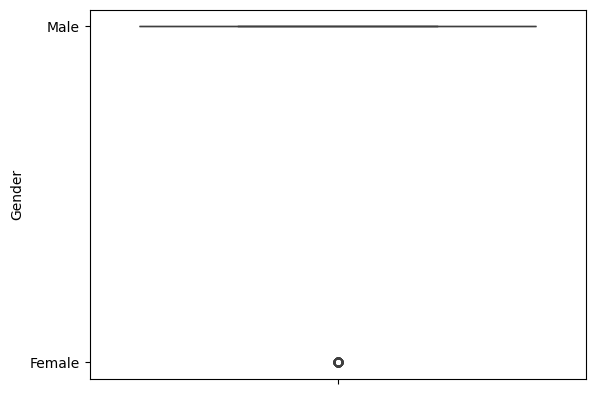

In [16]:
sns.boxplot(data=data['Gender'])

In [17]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.pipeline import Pipeline

In [18]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [19]:
num_col=[feature for feature in data.columns if data[feature].dtype != 'object']
cat_col=[feature for feature in data.columns if data[feature].dtype == 'object']

In [20]:
num_col

['ApplicantIncome', 'LoanAmount', 'Loan_Status']

In [21]:
cat_col

['Gender', 'Married', 'Education', 'Property_Area']

In [22]:
num_columns=['ApplicantIncome', 'LoanAmount']

In [23]:
num_pipeline=Pipeline([
    ('scaler',StandardScaler())
])

cat_pipeline=Pipeline([
    ('ordinal',OrdinalEncoder())
])

preprocess=ColumnTransformer([
    ('num_pipeline',num_pipeline,num_columns),
    ('cat_pipeline',cat_pipeline,cat_col)
])

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
X=data.drop(columns='Loan_Status',axis=1)
y=data['Loan_Status']

In [26]:
X=preprocess.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
log=LogisticRegression()

In [29]:
log.fit(X_train,y_train)

LogisticRegression()

In [30]:
pred=log.predict(X_test)

In [31]:
classification_report(y_test,pred)

c:\Users\HP\.conda\envs\loan_ml\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\.conda\envs\loan_ml\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\.conda\envs\loan_ml\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        22\n           1       0.71      1.00      0.83        54\n\n    accuracy                           0.71        76\n   macro avg       0.36      0.50      0.42        76\nweighted avg       0.50      0.71      0.59        76\n'

In [32]:
accuracy_score(y_test,pred)

0.7105263157894737

In [33]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
pred1=knn.predict(X_test)
accuracy_score(y_test,pred1)

0.6973684210526315